# Catboost
---
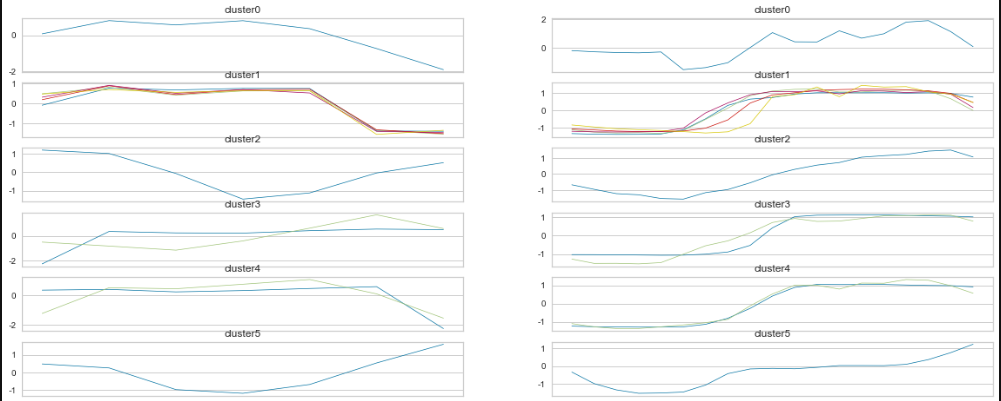
* Cluster 0 : Cluster 0 + Cluster 1
* Cluster 1 : Cluster 2 + Cluster 5
* Cluster 2 : Cluster 3
* Cluster 3 : Cluster 4

## 데이터 준비

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

C:\Users\yeji4\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\yeji4\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\yeji4\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
train = pd.read_csv('./data/train_0823.csv', encoding='cp949')

train.solar_yes = train.solar_yes.astype(int)
train.ess_yes = train.ess_yes.astype(int)
train.sy_ey = train.sy_ey.astype(int)
train.sy_en = train.sy_en.astype(int)

train['hour_sin'] = np.sin(2 * np.pi * train['hour']/23.0)
train['hour_cos'] = np.cos(2 * np.pi * train['hour']/23.0)

train['date_sin'] = -np.sin(2 * np.pi * (train['month']+train['day']/31)/12)
train['date_cos'] = -np.cos(2 * np.pi * (train['month']+train['day']/31)/12)

train['month_sin'] = -np.sin(2 * np.pi * train['month']/12.0)
train['month_cos'] = -np.cos(2 * np.pi * train['month']/12.0)

train['weekday_sin'] = -np.sin(2 * np.pi * (train['weekday']+1)/7.0)
train['weekday_cos'] = -np.cos(2 * np.pi * (train['weekday']+1)/7.0)


train['work_time'] = 0
train['low_day'] = 0
train['particular'] = 0

trains = [train[train.building_number == num] for num in range(1,101,1)]

In [3]:
## cluster 0
for num in [10,13]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    
    trains[num-1] = temp_df
for num in [14]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    trains[num-1] = temp_df
for num in [15]:
    temp_df = trains[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    trains[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [71]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    trains[num-1] = temp_df
for num in [53]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [55]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [56]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    trains[num-1] = temp_df
for num in [60]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [20,23]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [58,59,77]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [27,74,79]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [57]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [24,25]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [29,30]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [31]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    trains[num-1] = temp_df
for num in [50]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    trains[num-1] = temp_df
for num in [1]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [8]:
    temp_df = trains[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [12]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    trains[num-1] = temp_df
for num in [88,90]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [86]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    trains[num-1] = temp_df
for num in [87,89,91]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [4]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    trains[num-1] = temp_df
for num in [7,16]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    trains[num-1] = temp_df
for num in [9]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [11]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [36]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    trains[num-1] = temp_df
for num in [75]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    trains[num-1] = temp_df
for num in [92]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    trains[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = trains[num-1]
    temp_df = temp_df[temp_df.month>=7]
    trains[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [62,63,64]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [42,43,44]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [2,85,99]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [38,40,95]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    trains[num-1] = temp_df
for num in [3,81]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [6,41]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    trains[num-1] = temp_df
for num in [37,39]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    trains[num-1] = temp_df
for num in [35]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    trains[num-1] = temp_df
for num in [54]:
    temp_df = trains[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    trains[num-1] = temp_df
for num in [5]:
    temp_df = trains[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    trains[num-1] = temp_df
df = pd.concat(trains, ignore_index=True)
df = df.drop(['date_time','hour','day','month','weekday','date'], axis=1)

C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1437652206.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1437652206.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1437652206.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [4]:
df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]
df_3 = df[df.km_cluster==3]

X_0 = df_0.drop('power_consumption', axis=1)
y_0 = df_0['power_consumption']
y_0_log = np.log(y_0)
X_0_train = X_0.drop('km_cluster', axis=1)

X_1 = df_1.drop('power_consumption', axis=1)
y_1 = df_1['power_consumption']
y_1_log = np.log(y_1)
X_1_train = X_1.drop('km_cluster', axis=1)

X_2 = df_2.drop('power_consumption', axis=1)
y_2 = df_2['power_consumption']
y_2_log = np.log(y_2)
X_2_train = X_2.drop('km_cluster', axis=1)

X_3 = df_3.drop('power_consumption', axis=1)
y_3 = df_3['power_consumption']
y_3_log = np.log(y_3)
X_3_train = X_3.drop('km_cluster', axis=1)

# Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'date_sin', 'date_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'pcs_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'ma_dis_5', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean', 'sensory_temperature']

# ## one-hot encoding for categorical data
cat_li = ['building_number', 'holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_train, X_1_train, X_2_train, X_3_train]

for train in T :
    for col in con_li :
        if train[col].std() == 0:
            train = train.drop(col, axis=1)
        else :
            train[col] = (train[col] - train[col].mean())/train[col].std()

    for col in cat_li :
        if train[col].nunique() == 1:        
            train = train.drop(col,axis=1)
        
# X_0_train = X_0_train.drop('building_type', axis=1)
# X_2_train = X_2_train.drop('building_type', axis=1)
# X_5_train = X_5_train.drop('building_type', axis=1)

X_0_train.building_type = X_0_train.building_type.astype('category')
X_0_train = pd.get_dummies(X_0_train)
X_1_train.building_type = X_1_train.building_type.astype('category')
X_1_train = pd.get_dummies(X_1_train)
X_2_train.building_type = X_2_train.building_type.astype('category')
X_2_train = pd.get_dummies(X_2_train)
X_3_train.building_type = X_3_train.building_type.astype('category')
X_3_train = pd.get_dummies(X_3_train)

In [5]:
train = pd.read_csv('./data/train_0823.csv', encoding='cp949')
test = pd.read_csv('./data/test_0823.csv', encoding='cp949')

test.solar_yes = test.solar_yes.astype(int)
test.ess_yes = test.ess_yes.astype(int)
test.sy_ey = test.sy_ey.astype(int)
test.sy_en = test.sy_en.astype(int)

test['hour_sin'] = np.sin(2 * np.pi * test['hour']/23.0)
test['hour_cos'] = np.cos(2 * np.pi * test['hour']/23.0)

test['date_sin'] = -np.sin(2 * np.pi * (test['month']+test['day']/31)/12)
test['date_cos'] = -np.cos(2 * np.pi * (test['month']+test['day']/31)/12)

test['month_sin'] = -np.sin(2 * np.pi * test['month']/12.0)
test['month_cos'] = -np.cos(2 * np.pi * test['month']/12.0)
## cyclic transformation on weekday
test['weekday_sin'] = -np.sin(2 * np.pi * (test['weekday']+1)/7.0)
test['weekday_cos'] = -np.cos(2 * np.pi * (test['weekday']+1)/7.0)


test['work_time'] = 0
test['low_day'] = 0
test['particular'] = 0
tests = [test[test.building_number == num] for num in range(1,101,1)]

## cluster 0
for num in [10,13]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
    
    tests[num-1] = temp_df
for num in [14]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
    temp_df['particular'] = temp_df['hour'].isin([0,8,12,18]).astype(int)
    tests[num-1] = temp_df
for num in [15]:
    temp_df = tests[num-1]
    temp_df['work_time'] = (temp_df['hour'].isin([4,5,6,7,8])).astype(int)
    tests[num-1] = temp_df

## cluster 1
for num in [17,18,19,21,22,69,70,72]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [26,28,76,78,80,82,83,84]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [71]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)*(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = (((temp_df['weekday']==5)&(temp_df['hour'].isin([10,11,13,14])))
                               |((temp_df['weekday'].isin([0,1,2,3,4,5]))&(temp_df['hour'].isin([0,1,2,3,4])))).astype(int)
    tests[num-1] = temp_df
for num in [53]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=4)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [55]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=19)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [56]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    temp_df['particular'] = ((temp_df['weekday']==2)&(temp_df['hour']==16)).astype(int)
    tests[num-1] = temp_df
for num in [60]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [20,23]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [58,59,77]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [45,46,47,48,49,51,52,73]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=6)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [27,74,79]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [57]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [24,25]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=8)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [29,30]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=17)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [31]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    temp_df['low_day'] = (temp_df['weekday'].isin([5,6])).astype(int)
    tests[num-1] = temp_df
for num in [50]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==2)&(temp_df['hour']==16))|((temp_df['weekday']==2)&(temp_df['hour']==16))).astype(int)
    tests[num-1] = temp_df
for num in [1]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [8]:
    temp_df = tests[num-1]
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [12]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=5)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==6).astype(int)
    tests[num-1] = temp_df
for num in [88,90]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [86]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=8)).astype(int)
    temp_df['particular'] = ((temp_df['month']==6)&(temp_df['day']==26)).astype(int)
    tests[num-1] = temp_df
for num in [87,89,91]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [4]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=18)&(temp_df['hour']>=8)).astype(int)
    tests[num-1] = temp_df
for num in [7,16]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=5)).astype(int)
    tests[num-1] = temp_df
for num in [9]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=23)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [11]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=21)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [36]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=20)&(temp_df['hour']>=9)).astype(int)
    tests[num-1] = temp_df
for num in [75]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=15)&(temp_df['hour']>=7)).astype(int)
    tests[num-1] = temp_df
for num in [92]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']<=22)&(temp_df['hour']>=6)).astype(int)
    tests[num-1] = temp_df

## cluster 2
for num in [32,33,34]:
    temp_df = tests[num-1]
    temp_df = temp_df[temp_df.month>=7]
    tests[num-1] = temp_df
for num in [61,65,66,67,68]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [62,63,64]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df

## cluster 3
for num in [93,94,96,97,98,100]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=6)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [42,43,44]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [2,85,99]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [38,40,95]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=20)).astype(int)
    tests[num-1] = temp_df
for num in [3,81]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=9)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [6,41]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=8)&(temp_df['hour']<=22)).astype(int)
    tests[num-1] = temp_df
for num in [37,39]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=21)).astype(int)
    tests[num-1] = temp_df
for num in [35]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=7)&(temp_df['hour']<=23)).astype(int)
    tests[num-1] = temp_df
for num in [54]:
    temp_df = tests[num-1]
    temp_df['work_time'] = ((temp_df['hour']>=5)&(temp_df['hour']<=20)).astype(int)
    temp_df['low_day'] = (temp_df['weekday']==0).astype(int)
    tests[num-1] = temp_df
for num in [5]:
    temp_df = tests[num-1]
    temp_df['particular'] = (((temp_df['weekday']==4)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==5)&(temp_df['hour'].isin([11,12,13,14,15,16,17,18,19,20])))|
                              ((temp_df['weekday']==6)&(temp_df['hour'].isin([8,9,10,11,12,13,14,15,16,17,18])))).astype(int)
    tests[num-1] = temp_df
    

df = pd.concat(tests, ignore_index=True)
df = df.drop(['date_time','hour','day','month','weekday','date'], axis=1)
df.building_type = df.building_type.astype('category')

df_0 = df[df.km_cluster==0]
df_1 = df[df.km_cluster==1]
df_2 = df[df.km_cluster==2]
df_3 = df[df.km_cluster==3]

X_0_test = df_0.drop('km_cluster', axis=1)
X_1_test = df_1.drop('km_cluster', axis=1)
X_2_test = df_2.drop('km_cluster', axis=1)
X_3_test = df_3.drop('km_cluster', axis=1)

# Standard Scaling for continuous data
con_li = ['hour_sin', 'hour_cos', 'date_sin', 'date_cos', 'month_sin', 'month_cos', 'weekday_sin', 'weekday_cos', 'temperature', 'windspeed', 
'humidity', 'total_area', 'cooling_area', 'solar_power_capacity', 'ess_capacity', 'pcs_capacity', 'discomfort', 'temperature_3', 
'discomfort_3', 'ma_dis_3', 'ma_dis_5', 'CDH', 'temperature_mean', 'discomfort_mean', 'CDH_mean', 'sensory_temperature']


cat_li = ['building_number','building_type','holiday','air_yes','solar_yes',
         'ess_yes','sy_ey','sy_en','low_day','particular']

T = [X_0_test, X_1_test, X_2_test, X_3_test]

for test in T :
    for col in con_li :
        if test[col].std() == 0:
            test = test.drop(col, axis=1)
        else :
            test[col] = (test[col] - test[col].mean())/test[col].std()

    for col in cat_li :
        if test[col].nunique() == 1:        
            test = test.drop(col,axis=1)
    test = pd.get_dummies(test)

# X_0_test = X_0_test.drop('building_type', axis=1)
# X_2_test = X_2_test.drop('building_type', axis=1)
# X_5_test = X_5_test.drop('building_type', axis=1)

X_0_test.building_type = X_0_test.building_type.astype('category')
X_0_test = pd.get_dummies(X_0_test)
X_1_test.building_type = X_1_test.building_type.astype('category')
X_1_test = pd.get_dummies(X_1_test)
X_2_test.building_type = X_2_test.building_type.astype('category')
X_2_test = pd.get_dummies(X_2_test)
X_3_test.building_type = X_3_test.building_type.astype('category')
X_3_test = pd.get_dummies(X_3_test)

C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1756264675.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7,8])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1756264675.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['work_time'] = (temp_df['hour'].isin([6,7])).astype(int)
C:\Users\yeji4\AppData\Local\Temp/ipykernel_23844/1756264675.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [6]:
print(len(X_0_train) + len(X_1_train) + len(X_2_train) + len(X_3_train))
print(len(X_0_test) + len(X_1_test) + len(X_2_test) + len(X_3_test))

201840
16800


## 변수 중요도 시각화

### 변수 중요도 시각화 : Cluster 0

In [7]:
from sktime.forecasting.model_selection import temporal_train_test_split

cols = X_0_train.columns
y_train, y_valid, X_train, X_valid = temporal_train_test_split(y=y_0_log,X=X_0_train, test_size=168)

xgbr_0 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_0.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_valid,y_valid)], eval_metric="logloss")

importance = xgbr_0.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-243.43021
[1]	validation_0-logloss:-246.72635
[2]	validation_0-logloss:-248.44006
[3]	validation_0-logloss:-249.41238
[4]	validation_0-logloss:-250.05974
[5]	validation_0-logloss:-250.41756


C:\Users\yeji4\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\yeji4\anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-logloss:-250.70797
[7]	validation_0-logloss:-250.90328
[8]	validation_0-logloss:-251.03943
[9]	validation_0-logloss:-251.13367
[10]	validation_0-logloss:-251.19683
[11]	validation_0-logloss:-251.24151
[12]	validation_0-logloss:-251.27882
[13]	validation_0-logloss:-251.31174
[14]	validation_0-logloss:-251.33290
[15]	validation_0-logloss:-251.34564
[16]	validation_0-logloss:-251.35849
[17]	validation_0-logloss:-251.36125
[18]	validation_0-logloss:-251.36803
[19]	validation_0-logloss:-251.37028
[20]	validation_0-logloss:-251.37314
[21]	validation_0-logloss:-251.38221
[22]	validation_0-logloss:-251.38277
[23]	validation_0-logloss:-251.38356
[24]	validation_0-logloss:-251.38619
[25]	validation_0-logloss:-251.38641
[26]	validation_0-logloss:-251.38696
[27]	validation_0-logloss:-251.38943
[28]	validation_0-logloss:-251.39039
[29]	validation_0-logloss:-251.39130
[30]	validation_0-logloss:-251.39086
[31]	validation_0-logloss:-251.39390
[32]	validation_0-logloss:-251.39381
[33]	

,feature,importances
0,cooling_area,0.201954
1,building_type_Hospital,0.159179
2,work_time,0.144801
3,building_type_University,0.074447
4,sy_en,0.067071
5,building_type_Research Institute,0.063731
6,total_area,0.061695
7,low_day,0.048495
8,solar_power_capacity,0.046979
9,building_number,0.039879


In [8]:
non_zero_importance_columns_0 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_0

['cooling_area',
 'building_type_Hospital',
 'work_time',
 'building_type_University',
 'sy_en',
 'building_type_Research Institute',
 'total_area',
 'low_day',
 'solar_power_capacity',
 'building_number',
 'holiday',
 'sy_ey',
 'hour_cos',
 'building_type_Commercial',
 'ess_capacity',
 'discomfort',
 'date_sin',
 'temperature',
 'hour_sin',
 'particular',
 'weekday_cos',
 'weekday_sin',
 'temperature_3',
 'temperature_mean',
 'CDH_mean',
 'discomfort_mean',
 'ma_dis_3',
 'CDH',
 'ma_dis_5',
 'humidity',
 'sensory_temperature',
 'discomfort_3',
 'windspeed']

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


[0]	validation_0-logloss:-243.43021
[1]	validation_0-logloss:-246.72635
[2]	validation_0-logloss:-248.44006
[3]	validation_0-logloss:-249.41238
[4]	validation_0-logloss:-250.05974
[5]	validation_0-logloss:-250.41756


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-logloss:-250.70797
[7]	validation_0-logloss:-250.90328
[8]	validation_0-logloss:-251.03943
[9]	validation_0-logloss:-251.13367
[10]	validation_0-logloss:-251.19683
[11]	validation_0-logloss:-251.24151
[12]	validation_0-logloss:-251.27882
[13]	validation_0-logloss:-251.31174
[14]	validation_0-logloss:-251.33290
[15]	validation_0-logloss:-251.34564
[16]	validation_0-logloss:-251.35849
[17]	validation_0-logloss:-251.36125
[18]	validation_0-logloss:-251.36803
[19]	validation_0-logloss:-251.37028
[20]	validation_0-logloss:-251.37314
[21]	validation_0-logloss:-251.38221
[22]	validation_0-logloss:-251.38277
[23]	validation_0-logloss:-251.38356
[24]	validation_0-logloss:-251.38619
[25]	validation_0-logloss:-251.38641
[26]	validation_0-logloss:-251.38696
[27]	validation_0-logloss:-251.38943
[28]	validation_0-logloss:-251.39039
[29]	validation_0-logloss:-251.39130
[30]	validation_0-logloss:-251.39086
[31]	validation_0-logloss:-251.39390
[32]	validation_0-logloss:-251.39381
[33]	

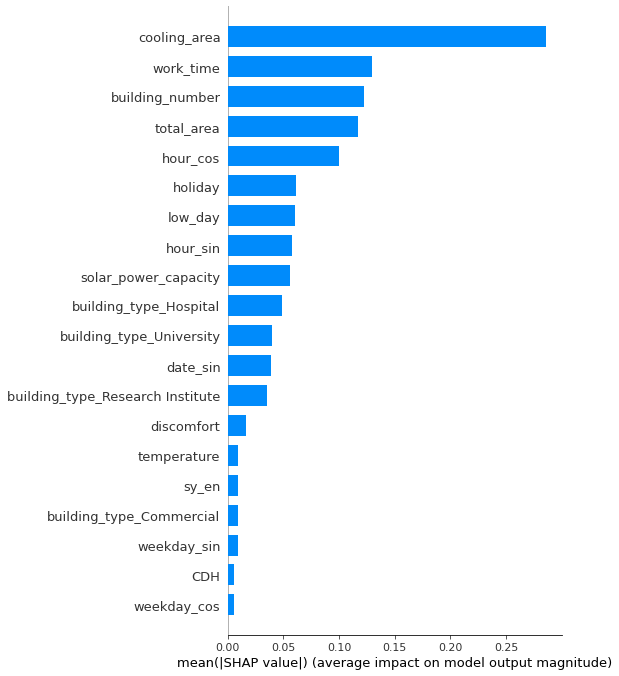

In [9]:
import shap

shap.initjs()

cols = X_0_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_0_log,X=X_0_train, test_size=168)

xgbr_0 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_0.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_0)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

### 변수 중요도 시각화 : Cluster 1

In [10]:
cols = X_1_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_1_log,X=X_1_train, test_size=168)

xgbr_1 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_1.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")

importance = xgbr_1.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-254.95955
[1]	validation_0-logloss:-258.48146
[2]	validation_0-logloss:-260.21835
[3]	validation_0-logloss:-261.23764
[4]	validation_0-logloss:-261.87826
[5]	validation_0-logloss:-262.31035
[6]	validation_0-logloss:-262.60244
[7]	validation_0-logloss:-262.80425
[8]	validation_0-logloss:-262.93665
[9]	validation_0-logloss:-263.03792
[10]	validation_0-logloss:-263.10460
[11]	validation_0-logloss:-263.15563
[12]	validation_0-logloss:-263.18773
[13]	validation_0-logloss:-263.21727
[14]	validation_0-logloss:-263.23667
[15]	validation_0-logloss:-263.25385
[16]	validation_0-logloss:-263.26588
[17]	validation_0-logloss:-263.27178
[18]	validation_0-logloss:-263.27739
[19]	validation_0-logloss:-263.28127
[20]	validation_0-logloss:-263.28648
[21]	validation_0-logloss:-263.29101
[22]	validation_0-logloss:-263.29223
[23]	validation_0-logloss:-263.29352
[24]	validation_0-logloss:-263.29520
[25]	validation_0-logloss:-263.29465
[26]	validation_0-logloss:-263.29412
[27]	valida

,feature,importances
0,building_number,0.693888
1,total_area,0.111161
2,cooling_area,0.094355
3,work_time,0.041106
4,ma_dis_5,0.022670
5,hour_cos,0.009503
6,date_sin,0.006622
7,hour_sin,0.005641
8,CDH,0.004889
9,holiday,0.003309


[0]	validation_0-logloss:-254.95955
[1]	validation_0-logloss:-258.48146
[2]	validation_0-logloss:-260.21835
[3]	validation_0-logloss:-261.23764
[4]	validation_0-logloss:-261.87826
[5]	validation_0-logloss:-262.31035
[6]	validation_0-logloss:-262.60244
[7]	validation_0-logloss:-262.80425
[8]	validation_0-logloss:-262.93665
[9]	validation_0-logloss:-263.03792
[10]	validation_0-logloss:-263.10460
[11]	validation_0-logloss:-263.15563
[12]	validation_0-logloss:-263.18773
[13]	validation_0-logloss:-263.21727
[14]	validation_0-logloss:-263.23667
[15]	validation_0-logloss:-263.25385
[16]	validation_0-logloss:-263.26588
[17]	validation_0-logloss:-263.27178
[18]	validation_0-logloss:-263.27739
[19]	validation_0-logloss:-263.28127


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[20]	validation_0-logloss:-263.28648
[21]	validation_0-logloss:-263.29101
[22]	validation_0-logloss:-263.29223
[23]	validation_0-logloss:-263.29352
[24]	validation_0-logloss:-263.29520
[25]	validation_0-logloss:-263.29465
[26]	validation_0-logloss:-263.29412
[27]	validation_0-logloss:-263.29517
[28]	validation_0-logloss:-263.29564
[29]	validation_0-logloss:-263.29610
[30]	validation_0-logloss:-263.29719
[31]	validation_0-logloss:-263.29805
[32]	validation_0-logloss:-263.29671
[33]	validation_0-logloss:-263.29636
[34]	validation_0-logloss:-263.29675
[35]	validation_0-logloss:-263.29656
[36]	validation_0-logloss:-263.29709
[37]	validation_0-logloss:-263.29674
[38]	validation_0-logloss:-263.29694
[39]	validation_0-logloss:-263.29700
[40]	validation_0-logloss:-263.29723
[41]	validation_0-logloss:-263.29689
[42]	validation_0-logloss:-263.29618
[43]	validation_0-logloss:-263.29582
[44]	validation_0-logloss:-263.29674
[45]	validation_0-logloss:-263.29695
[46]	validation_0-logloss:-263.29783
[

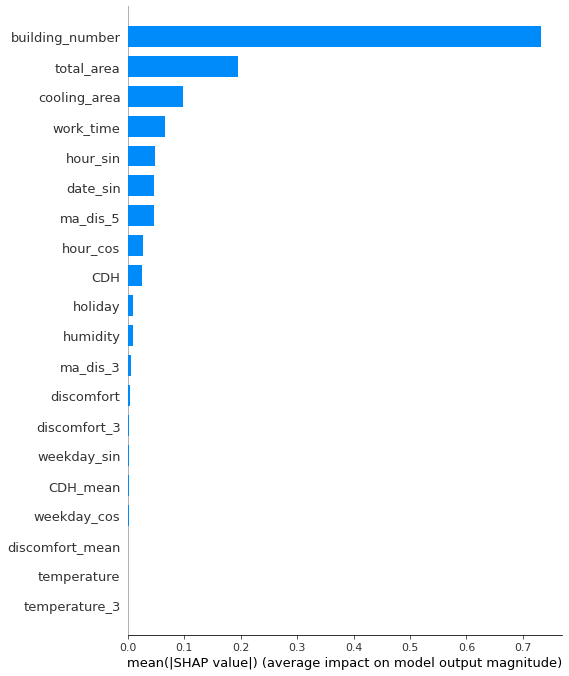

In [11]:
shap.initjs()

cols = X_1_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_1_log,X=X_1_train, test_size=168)

xgbr_1 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_1.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_1)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

In [12]:
non_zero_importance_columns_1 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_1

['building_number',
 'total_area',
 'cooling_area',
 'work_time',
 'ma_dis_5',
 'hour_cos',
 'date_sin',
 'hour_sin',
 'CDH',
 'holiday',
 'humidity',
 'ma_dis_3',
 'discomfort',
 'weekday_cos',
 'weekday_sin',
 'discomfort_3',
 'CDH_mean',
 'temperature_3',
 'discomfort_mean',
 'temperature_mean',
 'sensory_temperature',
 'temperature',
 'windspeed']

### 변수 중요도 시각화 : Cluster 2

In [13]:
cols = X_2_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_2_log,X=X_2_train, test_size=168)

xgbr_2 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_2.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")

importance = xgbr_2.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-215.62851
[1]	validation_0-logloss:-218.63763
[2]	validation_0-logloss:-220.13295
[3]	validation_0-logloss:-220.99298
[4]	validation_0-logloss:-221.55773
[5]	validation_0-logloss:-221.92699
[6]	validation_0-logloss:-222.17114
[7]	validation_0-logloss:-222.32719
[8]	validation_0-logloss:-222.44350
[9]	validation_0-logloss:-222.51268
[10]	validation_0-logloss:-222.56744
[11]	validation_0-logloss:-222.60986
[12]	validation_0-logloss:-222.63572
[13]	validation_0-logloss:-222.65362
[14]	validation_0-logloss:-222.65772
[15]	validation_0-logloss:-222.66756
[16]	validation_0-logloss:-222.67412
[17]	validation_0-logloss:-222.67203
[18]	validation_0-logloss:-222.67359
[19]	validation_0-logloss:-222.67584
[20]	validation_0-logloss:-222.67447
[21]	validation_0-logloss:-222.67550
[22]	validation_0-logloss:-222.67534
[23]	validation_0-logloss:-222.67319
[24]	validation_0-logloss:-222.67483
[25]	validation_0-logloss:-222.67277
[26]	validation_0-logloss:-222.67294
[27]	valida

,feature,importances
0,work_time,0.780607
1,total_area,0.120546
2,cooling_area,0.042613
3,building_number,0.010991
4,hour_cos,0.010558
5,hour_sin,0.007630
6,temperature,0.005386
7,holiday,0.003092
8,discomfort,0.003075
9,weekday_sin,0.002581


In [14]:
non_zero_importance_columns_2 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_2

['work_time',
 'total_area',
 'cooling_area',
 'building_number',
 'hour_cos',
 'hour_sin',
 'temperature',
 'holiday',
 'discomfort',
 'weekday_sin',
 'date_sin',
 'CDH_mean',
 'weekday_cos',
 'discomfort_mean',
 'temperature_mean',
 'solar_power_capacity',
 'ma_dis_3',
 'CDH',
 'windspeed',
 'humidity',
 'sensory_temperature',
 'ma_dis_5',
 'discomfort_3',
 'temperature_3']

[0]	validation_0-logloss:-215.62851
[1]	validation_0-logloss:-218.63763
[2]	validation_0-logloss:-220.13295
[3]	validation_0-logloss:-220.99298
[4]	validation_0-logloss:-221.55773
[5]	validation_0-logloss:-221.92699
[6]	validation_0-logloss:-222.17114
[7]	validation_0-logloss:-222.32719
[8]	validation_0-logloss:-222.44350
[9]	validation_0-logloss:-222.51268
[10]	validation_0-logloss:-222.56744
[11]	validation_0-logloss:-222.60986
[12]	validation_0-logloss:-222.63572
[13]	validation_0-logloss:-222.65362
[14]	validation_0-logloss:-222.65772


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[15]	validation_0-logloss:-222.66756
[16]	validation_0-logloss:-222.67412
[17]	validation_0-logloss:-222.67203
[18]	validation_0-logloss:-222.67359
[19]	validation_0-logloss:-222.67584
[20]	validation_0-logloss:-222.67447
[21]	validation_0-logloss:-222.67550
[22]	validation_0-logloss:-222.67534
[23]	validation_0-logloss:-222.67319
[24]	validation_0-logloss:-222.67483
[25]	validation_0-logloss:-222.67277
[26]	validation_0-logloss:-222.67294
[27]	validation_0-logloss:-222.67199
[28]	validation_0-logloss:-222.67026
[29]	validation_0-logloss:-222.66954
[30]	validation_0-logloss:-222.66873
[31]	validation_0-logloss:-222.66738
[32]	validation_0-logloss:-222.66680
[33]	validation_0-logloss:-222.66388
[34]	validation_0-logloss:-222.66535
[35]	validation_0-logloss:-222.66481
[36]	validation_0-logloss:-222.66480
[37]	validation_0-logloss:-222.66499
[38]	validation_0-logloss:-222.66449
[39]	validation_0-logloss:-222.66407
[40]	validation_0-logloss:-222.66475
[41]	validation_0-logloss:-222.66424
[

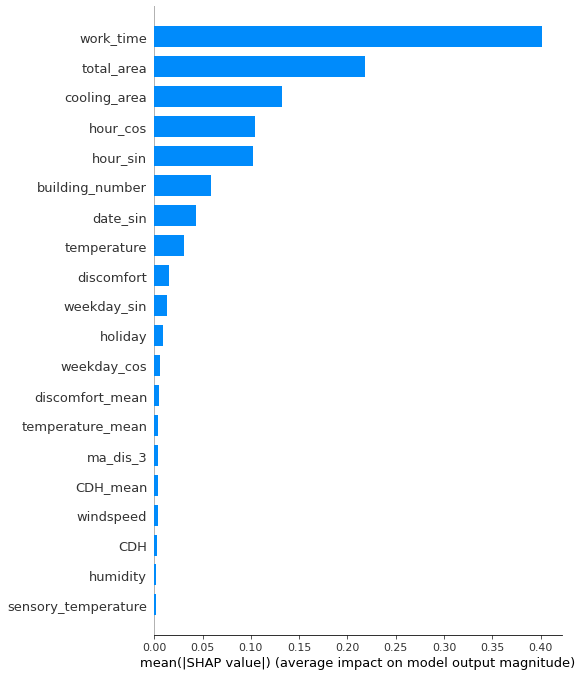

In [15]:
shap.initjs()

cols = X_2_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_2_log,X=X_2_train, test_size=168)

xgbr_2 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_2.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_2)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

### 변수 중요도 시각화 : Cluster 3

In [16]:
cols = X_3_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_3_log,X=X_3_train, test_size=168)

xgbr_3 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_3.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")

importance = xgbr_3.feature_importances_
feature = cols
importances = pd.DataFrame()
importances['feature'] = feature
importances['importances'] = importance
importances.sort_values('importances', ascending=False, inplace=True)
importances.reset_index(drop=True, inplace=True)
importances

[0]	validation_0-logloss:-229.53772
[1]	validation_0-logloss:-232.69418
[2]	validation_0-logloss:-234.27978
[3]	validation_0-logloss:-235.19398
[4]	validation_0-logloss:-235.79688
[5]	validation_0-logloss:-236.16961
[6]	validation_0-logloss:-236.42726
[7]	validation_0-logloss:-236.60247
[8]	validation_0-logloss:-236.72786
[9]	validation_0-logloss:-236.80379
[10]	validation_0-logloss:-236.85823
[11]	validation_0-logloss:-236.89328
[12]	validation_0-logloss:-236.91908
[13]	validation_0-logloss:-236.94189
[14]	validation_0-logloss:-236.95272
[15]	validation_0-logloss:-236.96302
[16]	validation_0-logloss:-236.96749
[17]	validation_0-logloss:-236.97199
[18]	validation_0-logloss:-236.97471
[19]	validation_0-logloss:-236.97822
[20]	validation_0-logloss:-236.97905
[21]	validation_0-logloss:-236.97997
[22]	validation_0-logloss:-236.97758
[23]	validation_0-logloss:-236.97751
[24]	validation_0-logloss:-236.98040
[25]	validation_0-logloss:-236.98195
[26]	validation_0-logloss:-236.98103
[27]	valida

,feature,importances
0,work_time,0.418295
1,building_number,0.106031
2,total_area,0.102340
3,particular,0.087142
4,hour_cos,0.055434
5,cooling_area,0.047200
6,hour_sin,0.038955
7,ess_capacity,0.036406
8,solar_power_capacity,0.021477
9,weekday_cos,0.014924


In [17]:
non_zero_importance_columns_3 = importances[importances['importances'] != 0]['feature'].tolist()
non_zero_importance_columns_3

['work_time',
 'building_number',
 'total_area',
 'particular',
 'hour_cos',
 'cooling_area',
 'hour_sin',
 'ess_capacity',
 'solar_power_capacity',
 'weekday_cos',
 'date_sin',
 'low_day',
 'temperature',
 'weekday_sin',
 'discomfort',
 'temperature_mean',
 'holiday',
 'CDH_mean',
 'ma_dis_5',
 'discomfort_mean',
 'humidity',
 'ma_dis_3',
 'CDH',
 'sensory_temperature',
 'temperature_3',
 'windspeed',
 'discomfort_3']

[0]	validation_0-logloss:-229.53772
[1]	validation_0-logloss:-232.69418
[2]	validation_0-logloss:-234.27978
[3]	validation_0-logloss:-235.19398
[4]	validation_0-logloss:-235.79688
[5]	validation_0-logloss:-236.16961
[6]	validation_0-logloss:-236.42726
[7]	validation_0-logloss:-236.60247
[8]	validation_0-logloss:-236.72786
[9]	validation_0-logloss:-236.80379
[10]	validation_0-logloss:-236.85823
[11]	validation_0-logloss:-236.89328


`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[12]	validation_0-logloss:-236.91908
[13]	validation_0-logloss:-236.94189
[14]	validation_0-logloss:-236.95272
[15]	validation_0-logloss:-236.96302
[16]	validation_0-logloss:-236.96749
[17]	validation_0-logloss:-236.97199
[18]	validation_0-logloss:-236.97471
[19]	validation_0-logloss:-236.97822
[20]	validation_0-logloss:-236.97905
[21]	validation_0-logloss:-236.97997
[22]	validation_0-logloss:-236.97758
[23]	validation_0-logloss:-236.97751
[24]	validation_0-logloss:-236.98040
[25]	validation_0-logloss:-236.98195
[26]	validation_0-logloss:-236.98103
[27]	validation_0-logloss:-236.97920
[28]	validation_0-logloss:-236.98300
[29]	validation_0-logloss:-236.98257
[30]	validation_0-logloss:-236.98291
[31]	validation_0-logloss:-236.98308
[32]	validation_0-logloss:-236.98294
[33]	validation_0-logloss:-236.98257
[34]	validation_0-logloss:-236.98216
[35]	validation_0-logloss:-236.97747
[36]	validation_0-logloss:-236.97519
[37]	validation_0-logloss:-236.97513
[38]	validation_0-logloss:-236.97916
[

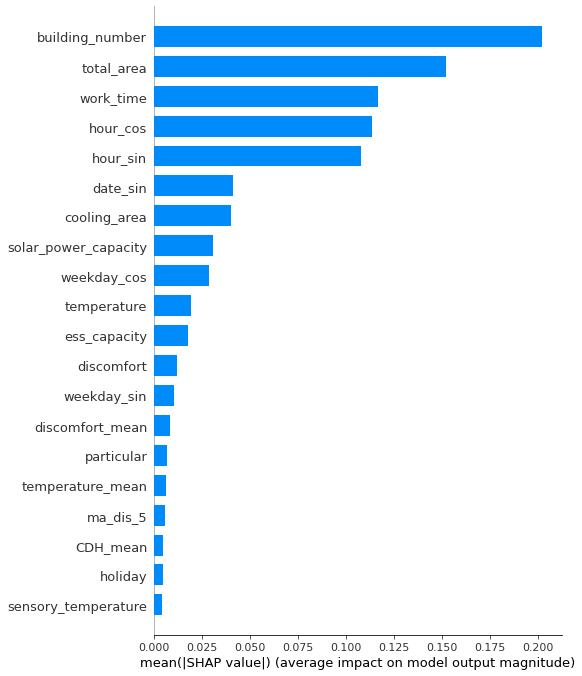

In [18]:
shap.initjs()

cols = X_3_train.columns
y_train, y_test, X_train, X_test = temporal_train_test_split(y=y_3_log,X=X_3_train, test_size=168)

xgbr_3 = XGBRegressor(objective='reg:squarederror', n_estimators=500)
xgbr_3.fit(X_train, y_train, early_stopping_rounds=50, eval_set=[(X_test,y_test)], eval_metric="logloss")
explainer = shap.TreeExplainer(xgbr_3)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, cols, plot_type="bar")

## 변수 선택

In [7]:
col_0 = ['cooling_area','work_time','building_type_Hospital','building_type_University','building_type_Research Institute',
        'solar_power_capacity','low_day','total_area','sy_en','holiday','building_number','building_type_Commercial',
 'hour_cos','temperature','hour_sin','date_sin','discomfort','weekday_sin','weekday_cos','CDH']
col_1 = ['building_number','total_area','cooling_area','work_time','ma_dis_5','hour_cos','date_sin','hour_sin','CDH','holiday',
 'humidity','ma_dis_3','discomfort','weekday_cos','weekday_sin','discomfort_3','CDH_mean','temperature_3','discomfort_mean',
'temperature_mean','sensory_temperature','temperature','windspeed']
col_2 = ['work_time','total_area','cooling_area','building_number','hour_cos','hour_sin','temperature','holiday',
 'discomfort','weekday_sin','date_sin','CDH_mean','weekday_cos','discomfort_mean','temperature_mean','solar_power_capacity',
 'ma_dis_3','CDH','windspeed','humidity','sensory_temperature','ma_dis_5','discomfort_3','temperature_3']
col_3 = ['work_time','building_number','total_area','particular','hour_cos','cooling_area','hour_sin','ess_capacity',
 'solar_power_capacity','weekday_cos', 'date_sin','low_day','temperature','weekday_sin','discomfort','temperature_mean',
 'holiday','CDH_mean','ma_dis_5','discomfort_mean','humidity','ma_dis_3','CDH','sensory_temperature','temperature_3',
'windspeed','discomfort_3']

X_0_train = X_0_train[col_0]
X_1_train = X_1_train[col_1]
X_2_train = X_2_train[col_2]
X_3_train = X_3_train[col_3]

X_0_test = X_0_test[col_0]
X_1_test = X_1_test[col_1]
X_2_test = X_2_test[col_2]
X_3_test = X_3_test[col_3]

## SMAPE

In [8]:
def smape(true, pred):
    v = 2 * abs(pred - true) / ((abs(pred) + abs(true)))
    result = np.mean(v) * 100
    return result

## Tuning : Optuna
### Tuning : Cluster 0, 2, 3

In [9]:
import optuna
from catboost import CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

trains = [X_0_train, X_2_train, X_3_train]
ys = [y_0_log, y_2_log, y_3_log]
cols = [col_0, col_2, col_3]

for i, (train, y, col) in enumerate(zip(trains, ys, cols)) :

    X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=168*train.building_number.nunique())
    def objective(trial):
        param = {
            'n_estimators': trial.suggest_int('n_estimators', 200, 800),
            'max_depth' : trial.suggest_int('max_depth', 10, len(col)),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 5),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
            'n_jobs' : -1,
            'random_state' : 2040
        }

        model = ExtraTreesRegressor(**param)
        model.fit(X_train,y_train)

        preds = model.predict(X_valid)

        sm = smape(np.exp(np.array(y_valid)), np.exp(np.array(preds)))

        return sm

    study = optuna.create_study(study_name = f'ET Optuna_cluster')
    study.optimize(objective, n_trials=30, timeout=12000)

    et = study.best_trial
    et_param = et.params
    print('Best Trial : score {},\nparams {}'.format(et.value, et_param))

    bestli.append(et.value)
    paramli.append(et_param)

[I 2023-08-23 22:18:59,616] A new study created in memory with name: ET Optuna_cluster
[I 2023-08-23 22:19:18,446] Trial 0 finished with value: 3.8973336638437863 and parameters: {'n_estimators': 650, 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 0 with value: 3.8973336638437863.
[I 2023-08-23 22:19:23,341] Trial 1 finished with value: 8.03649966395186 and parameters: {'n_estimators': 223, 'max_depth': 11, 'min_samples_split': 3, 'min_samples_leaf': 1}. Best is trial 0 with value: 3.8973336638437863.
[I 2023-08-23 22:19:39,613] Trial 2 finished with value: 3.743971432709012 and parameters: {'n_estimators': 491, 'max_depth': 18, 'min_samples_split': 2, 'min_samples_leaf': 5}. Best is trial 2 with value: 3.743971432709012.
[I 2023-08-23 22:19:54,105] Trial 3 finished with value: 6.694160155212317 and parameters: {'n_estimators': 596, 'max_depth': 12, 'min_samples_split': 2, 'min_samples_leaf': 1}. Best is trial 2 with value: 3.743971432709012.
[I 2023-08-

Best Trial : score 3.3450193030192947,
params {'n_estimators': 771, 'max_depth': 20, 'min_samples_split': 4, 'min_samples_leaf': 3}


NameError: name 'bestli' is not defined

### Tuning : Cluster 1

In [ ]:
import optuna
from catboost import CatBoostRegressor

trains = [X_0_train]
ys = [y_0_log]

cat_bestli = []
cat_paramli = []

for i, (train, y) in enumerate(zip(trains, ys)) :
    X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=168*train.building_number.nunique())
    def objective(trial):
        param = {}
        param['learning_rate'] = trial.suggest_float('learning_rate',0.02, 0.08, step=0.002)
        param['depth'] = trial.suggest_int('depth', 10, 16)
        param['l2_leaf_reg'] = trial.suggest_float('l2_leaf_reg',low=2.0, high=4, step=0.5)
        param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 2])
        param['grow_policy'] = 'Depthwise'
        param['iterations'] = 1000
        param['eval_metric'] = 'SMAPE'
        param['od_type'] = 'iter'
        param['od_wait'] = 20
        param['random_state'] = 1
        param['logging_level'] = 'Silent'
        regressor = CatBoostRegressor(**param)
        regressor.fit(X_train, y_train,early_stopping_rounds=50)
        sm = smape(np.exp(np.array(y_valid)), np.exp(np.array(regressor.predict(X_valid))))
        return sm

    study = optuna.create_study(study_name=f'catboost-seed')
    study.optimize(objective, n_trials=30, n_jobs=-1, timeout=12000)

    cat = study.best_trial
    cat_param = cat.params
    print('Best Trial: score {},\nparams {}'.format(cat.value, cat_param))

    cat_bestli.append(cat.value)
    cat_paramli.append(cat_param)

* 결과<br>
{'learning_rate': 0.028, 'depth': 10, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}

### Tuning : Catboost - Cluster 2, 3

In [9]:
import optuna
from catboost import CatBoostRegressor

trains = [X_2_train, X_3_train ]
ys = [y_2_log,y_3_log]

cat_bestli = []
cat_paramli = []

for i, (train, y) in enumerate(zip(trains, ys)) :
    X_train, X_valid, y_train, y_valid = train_test_split(train, y, test_size=168*train.building_number.nunique(), random_state = 42)
    def objective(trial):
        param = {}
        param['learning_rate'] = trial.suggest_float('learning_rate',0.02, 0.08, step=0.002)
        param['depth'] = trial.suggest_int('depth', 10, 16)
        param['l2_leaf_reg'] = trial.suggest_float('l2_leaf_reg',low=2.0, high=4, step=0.5)
        param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 2])
        param['grow_policy'] = 'Depthwise'
        param['iterations'] = 1000
        param['eval_metric'] = 'SMAPE'
        param['od_type'] = 'iter'
        param['od_wait'] = 20
        param['random_state'] = 1
        param['logging_level'] = 'Silent'
        param['thread_count']  = -1
        regressor = CatBoostRegressor(**param)
        regressor.fit(X_train, y_train,early_stopping_rounds=50)
        sm = smape(np.exp(np.array(y_valid)), np.exp(np.array(regressor.predict(X_valid))))
        return sm

    study = optuna.create_study(study_name=f'catboost-seed')
    study.optimize(objective, n_trials=30, timeout=12000)

    cat = study.best_trial
    cat_param = cat.params
    print('Best Trial: score {},\nparams {}'.format(cat.value, cat_param))

    cat_bestli.append(cat.value)
    cat_paramli.append(cat_param)

[I 2023-08-23 23:08:23,272] A new study created in memory with name: catboost-seed
[I 2023-08-23 23:09:11,382] Trial 0 finished with value: 4.779221370806901 and parameters: {'learning_rate': 0.028, 'depth': 10, 'l2_leaf_reg': 2.0, 'min_child_samples': 2}. Best is trial 0 with value: 4.779221370806901.
[I 2023-08-23 23:10:55,666] Trial 1 finished with value: 4.556934919058737 and parameters: {'learning_rate': 0.038000000000000006, 'depth': 11, 'l2_leaf_reg': 4.0, 'min_child_samples': 1}. Best is trial 1 with value: 4.556934919058737.
[I 2023-08-23 23:13:03,782] Trial 2 finished with value: 4.625573145635822 and parameters: {'learning_rate': 0.052000000000000005, 'depth': 14, 'l2_leaf_reg': 3.5, 'min_child_samples': 2}. Best is trial 1 with value: 4.556934919058737.
[I 2023-08-23 23:17:23,697] Trial 3 finished with value: 4.7209440926832205 and parameters: {'learning_rate': 0.041999999999999996, 'depth': 16, 'l2_leaf_reg': 2.0, 'min_child_samples': 2}. Best is trial 1 with value: 4.5569

Best Trial: score 4.471083692302249,
params {'learning_rate': 0.076, 'depth': 11, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}


[I 2023-08-24 01:06:06,933] Trial 0 finished with value: 4.126524221346497 and parameters: {'learning_rate': 0.02, 'depth': 16, 'l2_leaf_reg': 2.0, 'min_child_samples': 1}. Best is trial 0 with value: 4.126524221346497.
[I 2023-08-24 01:07:58,330] Trial 1 finished with value: 4.515432659899369 and parameters: {'learning_rate': 0.068, 'depth': 11, 'l2_leaf_reg': 4.0, 'min_child_samples': 2}. Best is trial 0 with value: 4.126524221346497.
[I 2023-08-24 01:31:10,756] Trial 2 finished with value: 4.123156490805995 and parameters: {'learning_rate': 0.038000000000000006, 'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}. Best is trial 2 with value: 4.123156490805995.
[I 2023-08-24 01:33:05,101] Trial 3 finished with value: 4.595266746772681 and parameters: {'learning_rate': 0.036000000000000004, 'depth': 11, 'l2_leaf_reg': 4.0, 'min_child_samples': 2}. Best is trial 2 with value: 4.123156490805995.
[I 2023-08-24 01:48:29,071] Trial 4 finished with value: 4.204362463123977 and paramete

Best Trial: score 4.123156490805995,
params {'learning_rate': 0.038000000000000006, 'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}


## Predict

In [10]:
hyperparams =  [{'learning_rate': 0.044, 'depth': 16, 'l2_leaf_reg': 2.0, 'min_child_samples': 1},
                    {'learning_rate': 0.028, 'depth': 10, 'l2_leaf_reg': 3.0, 'min_child_samples': 1},
                {'learning_rate': 0.076, 'depth': 11, 'l2_leaf_reg': 3.0, 'min_child_samples': 1},
                {'learning_rate': 0.038000000000000006, 'depth': 15, 'l2_leaf_reg': 3.0, 'min_child_samples': 1}
               ]

SEED = 2
np.random.seed(SEED)

from catboost import CatBoostRegressor
cats = [CatBoostRegressor(random_state = SEED, verbose = False, **params) for params in hyperparams]

X_tests = [X_0_test, X_1_test, X_2_test, X_3_test]
X_trains = [X_0_train, X_1_train, X_2_train, X_3_train]
y_trains_log = [y_0_log, y_1_log,y_2_log, y_3_log]

for i, (X_test, X_tr, y_tr, cat) in enumerate(zip(X_tests, X_trains, y_trains_log, cats)):
    cat.fit(X_tr, y_tr, verbose = False)
    X_test['answer'] = np.exp(np.array(cat.predict(X_test)))
    X_test.to_csv(f'X_{i}_test_pred.csv', encoding='cp949', index=False)
    print(f"X_{i}_test_pred.csv")

X_0_test_pred.csv
X_1_test_pred.csv
X_2_test_pred.csv
X_3_test_pred.csv
